# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: This is a classification problem because the need is to separate students into two classes - those who need early intervention before graduation and those who don't, as opposed to say the degree of help a student needs.**

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [23]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [24]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = student_data['passed'].tolist().count('yes')

# TODO: Calculate failing students
n_failed = student_data['passed'].tolist().count('no')

# TODO: Calculate graduation rate
grad_rate = float ( n_passed )/ n_students*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [25]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [26]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [27]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify = y_all, test_size= 95, random_state = 42)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
The three models I chose are:

- Support Vector Machines (SVM)
    - Real world application : Emotion classification from photos or EEG signals(http://cseweb.ucsd.edu/~elkan/254spring01/mdumasrep.pdf)
    - Strengths : 
        - Works well with large number of features in complicated domains. Kernel trick is useful in separating these.
        - Works well when there is clear margin of separation.
    - Weakness :
        - Does not scale well. Performs poorly with large datasets. Might also have overfitting problems at bigger data sets and has long training times.
        - Does not handle noise in data well.
    - Reason for selection : 
        - We have a relatively small dataset with lots of features. By mapping them to higher dimensions we should be able to find a clear separation between those that pass and those that fail.
- Gaussian Naive Bayes (GaussianNB)
    - Real world application : GaussianNB is a popular choice for classifying textual data (http://www.ibm.com/developerworks/library/bd-natural-language/index.html)
    - Strengths : 
        - Works well when the features are conditionally independant
        - Scales well
        - Trains quickly
    - Weaknesses : 
        - Might oversimplify the problem and not represent it fully. That is, it will ignore if one feature is dependant on another. For example, family size and free time might be related but the GaussianNB model might not capture this.
    - Reason for selection :
        - Considering most features in this dataset are independent, a Bayesian approach might allow us to narrow down features that lead to a person passing or failing. (Some features might not affect outcome). For clarification, I am making an assumption that although all features affect the outcome of the target class, they are not dependant on each other. In case this happens to be true, GaussianNB will work better than sophisticated methods. 
- Ensemble methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
    - Real World Application : Human Genome Analysis, in this case detection of RNA sites susceptible to cancer attacks(http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0131627)
    - Strengths :
        - Ensemble methods reduce bias, variance and are unlikely to overfit.
    - Weaknesses :
        - Becomes kind of a black box
    - Reason for selection : 
        - Using a method such as AdaBoost allows us to focus on instances that have not been learnt. This is likely to result in a more flexible classification of features.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [28]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [29]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = SVC(kernel='linear', random_state=42)
clf_B = GaussianNB()
clf_C = AdaBoostClassifier(random_state=42)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)


Training a SVC using a training set size of 100. . .
Trained model in 0.1580 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.8750.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.6614.
Training a SVC using a training set size of 200. . .
Trained model in 0.0640 seconds
Made predictions in 0.0070 seconds.
F1 score for training set: 0.8369.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7368.
Training a SVC using a training set size of 300. . .
Trained model in 0.0950 seconds
Made predictions in 0.0090 seconds.
F1 score for training set: 0.8447.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7626.
Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0030 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.7752.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.6457.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0020 seconds
Made pred

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - ?**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |           0.1580 seconds | 0.0030 seconds | 0.8750 |  0.6614                     |
| 200               |        0.0640 seconds    | 0.0030 seconds | 0.8369 |  0.7368              |
| 300               |       0.0950 seconds    | 0.0030 seconds | 0.8447 |    0.7626     |

** Classifer 2 - ?**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0030 seconds      |  0.0010 seconds        |  0.7752          |  0.6457         |
| 200               |    0.0020 seconds      | 0.0010 seconds         |  0.8060          |  0.7218         |
| 300               |    0.0060 seconds       | 0.0010 seconds         |  0.8134         |     0.7761     |

** Classifer 3 - ?**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.6600 seconds         |   0.0190 seconds       |    0.9778       |   0.6880        |
| 200               | 0.6260 seconds          |   0.0230 seconds       |   0.8905        |   0.7445        |
| 300               |  0.5970 seconds         |   0.0170 seconds       |   0.8565         |   0.7328       |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

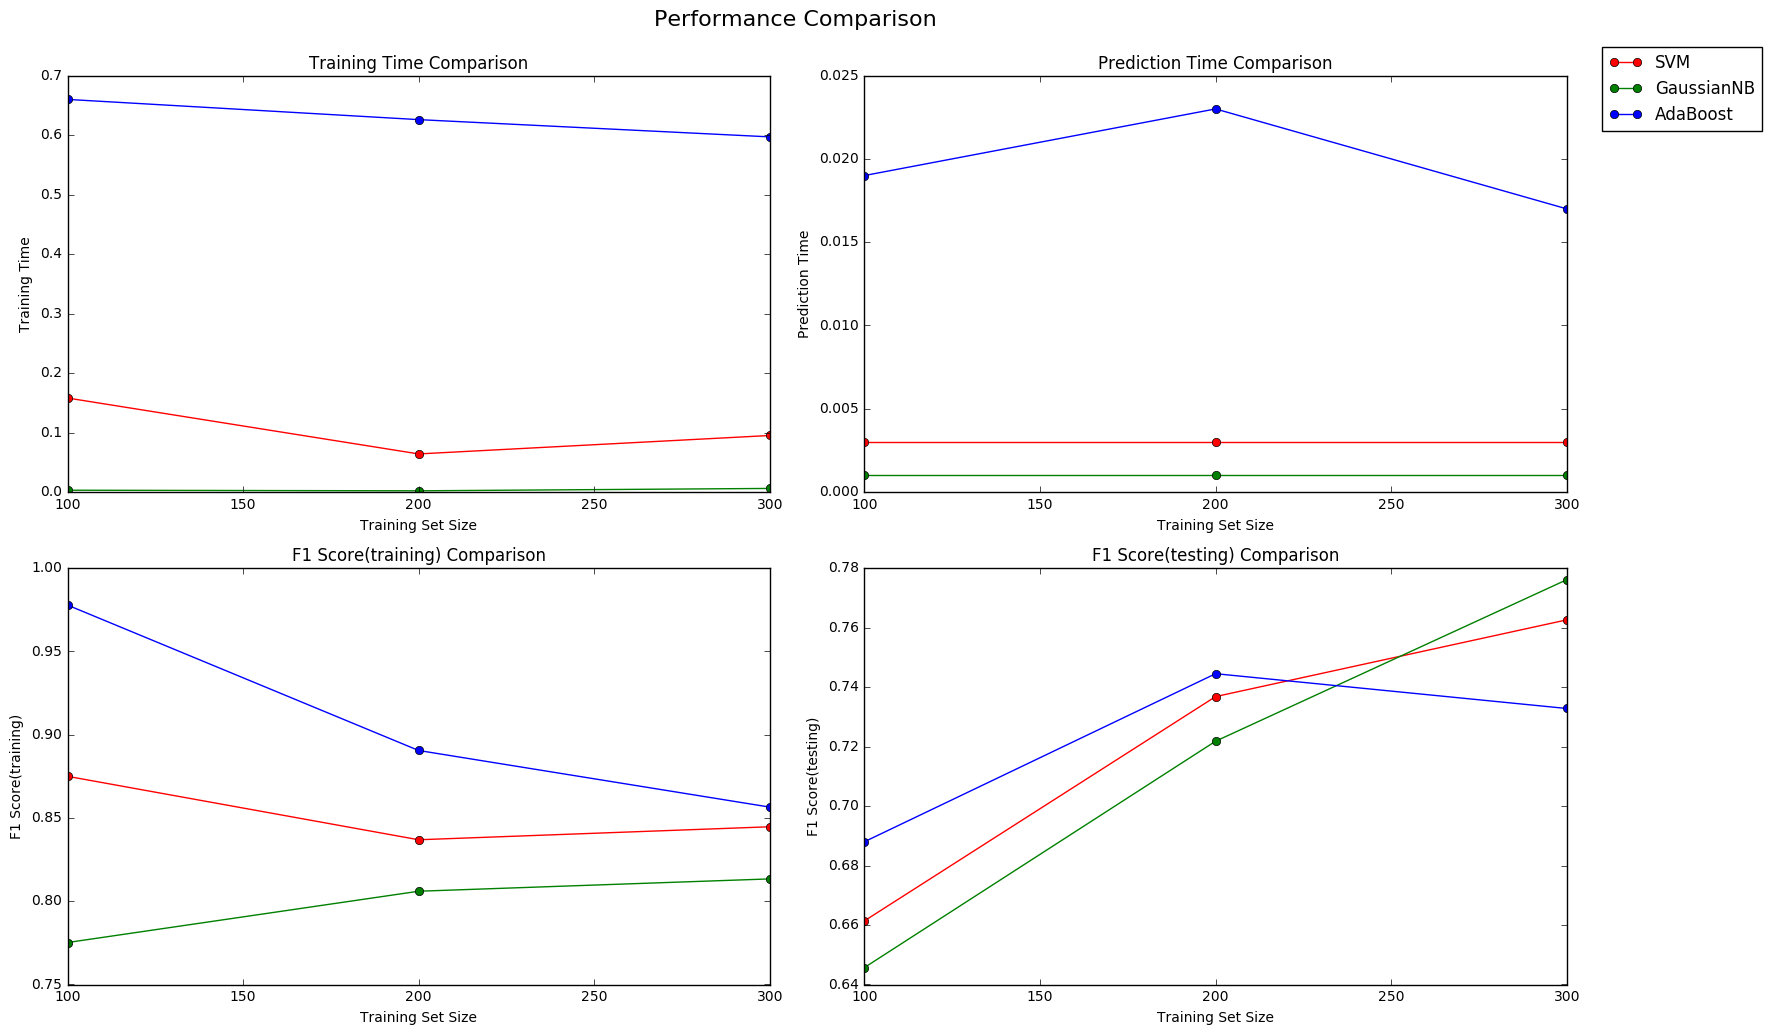

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

training_time = {}
training_time['SVM'] =[0.1580, 0.0640, 0.0950]
training_time['GaussianNB'] = [0.0030, 0.0020, 0.0060]
training_time['AdaBoost'] = [ 0.6600,  0.6260, 0.5970]

prediction_time = {}
prediction_time['SVM'] = [0.0030,0.0030,0.0030]
prediction_time['GaussianNB'] = [0.0010,0.0010,0.0010]
prediction_time['AdaBoost'] = [0.0190,0.0230,0.0170]

f1_score_train = {}
f1_score_train['SVM'] = [0.8750,0.8369,0.8447]
f1_score_train['GaussianNB'] = [0.7752,0.8060,0.8134]
f1_score_train['AdaBoost'] = [0.9778,0.8905,0.8565]

f1_score_test = {}
f1_score_test['SVM'] = [0.6614,0.7368,0.7626]
f1_score_test['GaussianNB'] = [0.6457,0.7218,0.7761]
f1_score_test['AdaBoost'] = [0.6880,0.7445,0.7328]

results = {}
results['Training Time'] = training_time
results['Prediction Time'] = prediction_time
results['F1 Score(training)'] = f1_score_train
results['F1 Score(testing)'] = f1_score_test

training_size = [100, 200, 300]
models = ['SVM', 'GaussianNB', 'AdaBoost']
metrics = ['Training Time', 'Prediction Time', 'F1 Score(training)', 'F1 Score(testing)']

fig = plt.figure(figsize=(16, 10))

for k, metric in enumerate(metrics): 
    ax = fig.add_subplot(2, 2, k+1)
    ax.plot(training_size, results[metric]['SVM'], 'o-', color = 'r', label = 'SVM')
    ax.plot(training_size, results[metric]['GaussianNB'], 'o-', color = 'g', label = 'GaussianNB')
    ax.plot(training_size, results[metric]['AdaBoost'], 'o-', color = 'b', label = 'AdaBoost')
    ax.set_title('{} Comparison'.format(metric))
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel(metric)
    
ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
fig.suptitle('Performance Comparison', fontsize = 16, y = 1.03)
fig.tight_layout()

**Answer: **
The visualization above helps us compare computational performance metrics and accuracy metrics.

- **Training time :** The GaussianNB model outperforms the other models significantly in this criteria. The AdaBoost model performs pretty badly.
- **Testing time :** The GaussianNB model is the best in this case too. The AdaBoost model is again pretty bad.
- **F1 Score for training:** The AdaBoost model outperforms the other other models in training. The initial high F1 Score for AdaBoost could indicate overfitting.
- **F1 Score for testing:** The AdaBoost model is better when the training set is 100, 200 but drops slightly when the size is 300.

Using an algorithm similar to Ensemble, I applied weights to each of these metrics based on how important they are and scored each model on its relative performace. Since our dataset is small, more importance is given to F1 Score than computational performance. In case we need to scale the weights below can be changed to give more importance to computational limitations. Also, F1 score for training tells us how well the models fit the data and F1 score for testing gives us an idea of how well the model generalizes.

Weights : training time = 0.0, prediction time = 0.0, F1 score training = 0.5, F1 score testing = 0.5

|   |Training Time|Prediction Time|F1 Score(train)|F1 Score(testing)|
|---|---|---|---|---|
|SVM|0.03|0.24|0.33|0.33|
|GaussianNB|0.96|0.72|0.31|0.33|
|AdaBoost|0.01|0.04|0.36|0.34|

**Scores:**
- SVM = 0.03 \* 0.0 + 0.24 \* 0.0 + 0.33 \* 0.5 + 0.33 \* 0.5 = 0.33
- GaussianNB = 0.96 \* 0.0 + 0.72 \* 0.0 + 0.31 \* 0.5 + 0.33 \* 0.5 = 0.32
- AdaBoost = 0.01 \* 0.0 + 0.04 \* 0.0 + 0.36 \* 0.5 + 0.34 \* 0.5 = 0.35

Hence, based solely on slightly better performance, I choose AdaBoost.



### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
AdaBoost or Adaptive Boosting is a type of Ensemble Learning technique based on the idea of boosting. Initially, all the instances in the training set are given equal weights and a base weak learner (a low complexity model like Decision Trees)is trained on the set. Based on the classification error, the weights are reassigned so that the instances that were not classified properly get more importance and the process is repeated with another weak learner. After repeating this process on multiple learners, the outputs of each of these weak learners is combined to give the output of the AdaBoost Classifier. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [35]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[5,25,50,100,200], 'learning_rate':[0.1, 0.25,0.5,0.75,1.0], 'algorithm':('SAMME', 'SAMME.R')}

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=42)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0040 seconds.
Tuned model has a training F1 score of 0.8400.
Made predictions in 0.0030 seconds.
Tuned model has a testing F1 score of 0.7746.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
The final model's F1 Score is 0.8400 for training and 0.7746 for testing. The F1 Score is improved for the testing set but has slightly decreased for training set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.